1- Plan the tasks you want to achieve, list and import all needed modules and packages

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
%matplotlib inline


2- Upload the file and basic information in preparation for the main analysis

In [2]:
file_name = 'loan.csv'

In [3]:
df= pd.read_csv('loan.csv', low_memory = False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3- Generate your training and testing data sets 

In [4]:
#Shake the dataset well to spit out a few random samples as you go
rows = df.index
row_count = len(rows)
random.shuffle(list(rows))

df.reindex(rows)
#Since this data set is relatively large, a 10% sample will sufice for each set
training_data = df[row_count // 10:]
testing_data = df[:row_count // 10]

4- Check your data set parameters and pick relevant variables based on previous basic analysis and observations

In [5]:
testing_data.shape

(88737, 74)

In [6]:
training_data.shape

(798642, 74)

In [16]:
#I want to predict annual income to target
df1 = testing_data[['annual_inc','funded_amnt','purpose']]

In [17]:
df1

,annual_inc,funded_amnt,purpose
0,24000.00,5000.0,credit_card
1,30000.00,2500.0,car
2,12252.00,2400.0,small_business
3,49200.00,10000.0,other
4,80000.00,3000.0,other
5,36000.00,5000.0,wedding
6,47004.00,7000.0,debt_consolidation
7,48000.00,3000.0,car
8,40000.00,5600.0,small_business
9,15000.00,5375.0,other


In [15]:
df1.shape

(88737, 3)

5- Prepare by plotting your soon to be y value and x value(s) from your testing data set

This section shows 10% of the data (sample pop.)

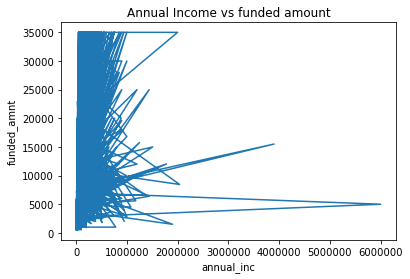

In [20]:
#plot your first sample data set
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('annual_inc')
ax1.set_ylabel('funded_amnt')
ax1.set_title('Annual Income vs funded amount')
ax1.plot('annual_inc', 'funded_amnt', data = df1);
plt.show()

This sections shows 50%

6- Repeat process for your training data set

In [22]:
rows = training_data.index
row_count = len(rows)
random.shuffle(list(rows))

training_data.reindex(rows)

training_data2 = training_data[row_count // 10:]
testing_data2 = training_data[:row_count // 10]

In [23]:
testing_data2.shape

(79864, 74)

In [24]:
df2 = testing_data2[['annual_inc','funded_amnt','purpose']]

In [102]:
df2

,dti,funded_amnt,purpose
88737,32.58,7750.0,debt_consolidation
88738,13.71,15000.0,home_improvement
88739,25.44,10000.0,credit_card
88740,22.52,18000.0,debt_consolidation
88741,11.06,22000.0,other
88742,24.21,7550.0,debt_consolidation
88743,19.45,17200.0,credit_card
88744,22.87,30000.0,debt_consolidation
88745,27.12,5500.0,home_improvement
88746,20.15,24000.0,debt_consolidation


In [25]:
df2.shape

(79864, 3)

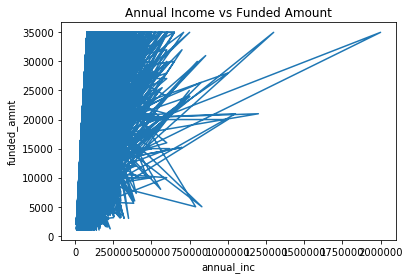

In [26]:
#plot your second sample data set
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('annual_inc')
ax1.set_ylabel('funded_amnt')
ax1.set_title('Annual Income vs Funded Amount')
ax1.plot('annual_inc', 'funded_amnt', data = df2);
plt.show()

7- Compare your training and testing data sets graphically

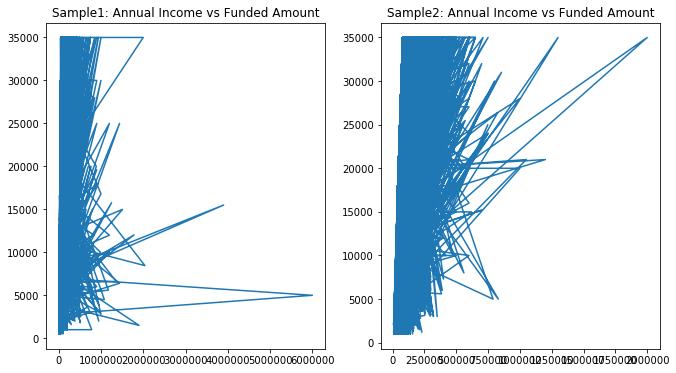

In [27]:
#compare both of them on a dual subplot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (11,6));
axes[0].plot('annual_inc', 'funded_amnt', data = df1);
axes[0].set_title('Sample1: Annual Income vs Funded Amount');
axes[1].plot('annual_inc', 'funded_amnt', data = df2);
axes[1].set_title('Sample2: Annual Income vs Funded Amount');

8- Grab another testing data set sample in preparation for your Rolling/Smoothing analysis in order to find a more defined pattern. This is done better by finding a fitting line. 

In [28]:
rows = training_data.index
row_count = len(rows)
random.shuffle(list(rows))

training_data.reindex(rows)

training_data3 = training_data[row_count // 10:]
testing_data3 = training_data[:row_count // 4]

In [29]:
testing_data3.shape

(199660, 74)

In [30]:
df3 = testing_data3[['annual_inc','funded_amnt','purpose']]

In [31]:
df3.head(5)

,annual_inc,funded_amnt,purpose
88737,44275.0,7750.0,debt_consolidation
88738,113000.0,15000.0,home_improvement
88739,50000.0,10000.0,credit_card
88740,60000.0,18000.0,debt_consolidation
88741,104500.0,22000.0,other


In [32]:
df3['Rolling_Mean'] = df3['annual_inc'].rolling(window = 80).mean()
df3.head(10)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,annual_inc,funded_amnt,purpose,Rolling_Mean
88737,44275.0,7750.0,debt_consolidation,NaN
88738,113000.0,15000.0,home_improvement,NaN
88739,50000.0,10000.0,credit_card,NaN
88740,60000.0,18000.0,debt_consolidation,NaN
88741,104500.0,22000.0,other,NaN
88742,28000.0,7550.0,debt_consolidation,NaN
88743,138000.0,17200.0,credit_card,NaN
88744,79000.0,30000.0,debt_consolidation,NaN
88745,25920.0,5500.0,home_improvement,NaN
88746,92000.0,24000.0,debt_consolidation,NaN


9- Compare your original two sample data sets (testiing and training) and your newly generated smoothed line. 

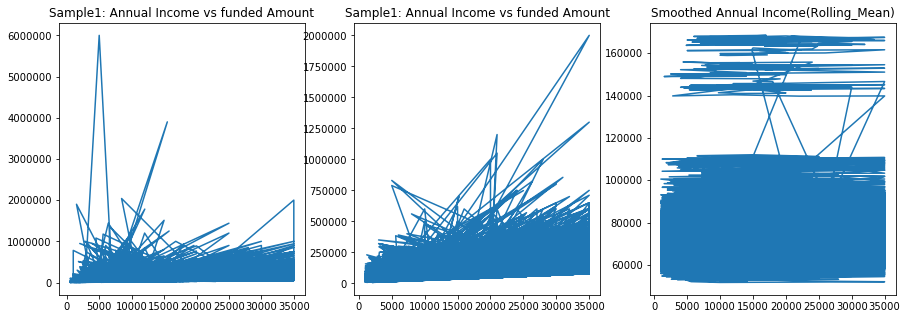

In [55]:
#create a triple subplot where you also include your smoothed line
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5));
axes[0].plot('funded_amnt', 'annual_inc', data = df1);
axes[0].set_title('Sample1: Annual Income vs funded Amount');
axes[1].plot('funded_amnt', 'annual_inc', data = df2);
axes[1].set_title('Sample1: Annual Income vs funded Amount');
axes[2].plot('funded_amnt', 'Rolling_Mean', data = df3);
axes[2].set_title('Smoothed Annual Income(Rolling_Mean)');

10- Prepare data for your linear regression calculation by finding pertinent data ranges and inserting your linear regression built in functions from the SKlearn package. The output will result in your designated coefficients ready to be inserted into your immaginary linear regression equation. 

In [56]:
df3_keypar = df3[(df3['annual_inc'] >= 1000) & (df3['annual_inc'] <= 110000)] 


In [57]:
df3_keypar.head(5)

,annual_inc,funded_amnt,purpose,Rolling_Mean
88737,44275.0,7750.0,debt_consolidation,NaN
88739,50000.0,10000.0,credit_card,NaN
88740,60000.0,18000.0,debt_consolidation,NaN
88741,104500.0,22000.0,other,NaN
88742,28000.0,7550.0,debt_consolidation,NaN


In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model = LinearRegression().fit(df3_keypar[['annual_inc']], df3_keypar[['funded_amnt']])
m = model.coef_[0]
b = model.intercept_
#equation of the line
#print 'y = ', round(m[0],2), 'x + ', round(b[0],2) ~ get invalid syntax error so it didn't print go back and check on syntax 
# using the equation of the line to get y values
predicted_annualinc = model.predict(df3_keypar[['annual_inc']])
predicted_annualinc[0:5]


array([[ 11015.4991531 ],
       [ 11911.81290984],
       [ 13477.42645873],
       [ 20444.40675129],
       [  8467.46310228]])

In [60]:
predicted_annualinc = pd.DataFrame(data = predicted_annualinc, index = df3_keypar.index.values, columns = ['Predicted Annual Income'])
predicted_annualinc.head()

,Predicted Annual Income
88737,11015.499153
88739,11911.812910
88740,13477.426459
88741,20444.406751
88742,8467.463102


In [62]:
joined_df = df3_keypar.join(predicted_annualinc, how = 'inner')
joined_df.head()

,annual_inc,funded_amnt,purpose,Rolling_Mean,Predicted Annual Income
88737,44275.0,7750.0,debt_consolidation,NaN,11015.499153
88739,50000.0,10000.0,credit_card,NaN,11911.812910
88740,60000.0,18000.0,debt_consolidation,NaN,13477.426459
88741,104500.0,22000.0,other,NaN,20444.406751
88742,28000.0,7550.0,debt_consolidation,NaN,8467.463102


11- Plot your coefficients and previously calculated "Smoothed Linear line" to your graph in order to compare them both and provide insight with your linear regression line. 

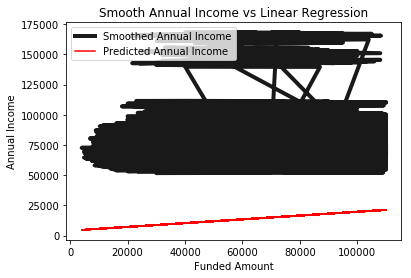

In [63]:
#Et voila! votre ligne predictive
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(joined_df['annual_inc'], joined_df['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed Annual Income');
ax.plot(joined_df['annual_inc'], joined_df['Predicted Annual Income'], color = (1,0,0), label = 'Predicted Annual Income');
ax.set_title('Smooth Annual Income vs Linear Regression')
ax.set_xlabel('Funded Amount')
ax.set_ylabel('Annual Income')
ax.legend(loc='upper left');

12- Remember to calculate your R Square.

In [65]:
import sklearn

r_squared = sklearn.metrics.r2_score(joined_df['funded_amnt'],joined_df['Predicted Annual Income'],multioutput='uniform_average')
r_squared

0.21512531032775828